Set the Python path

In [1]:
# Change Python path
import os, sys
os.chdir("/LOCALDATA/ARTHURs_FILES/Codigos/")
print(os.getcwd())
sys.path.append('python_modules')

# Enables modules autoreload (important during development)
%load_ext autoreload
%autoreload 2

/LOCALDATA/ARTHURs_FILES/Codigos


Load the data

In [2]:
from data_managers.load_dataset import load_cmems_sst, load_cmems_mfc, load_dragonera_insitu

ds_cmems_sst = load_cmems_sst(
    years=range(2009, 2023),
    lon_selector=2.10,
    lat_selector=39.56,
)

ds_cmems_mfc = load_cmems_mfc(
    years=range(2009, 2022),
    lon_selector=2.10,
    lat_selector=39.56,
    depth_selector=[0,3],
)

ds_dragonera_insitu = load_dragonera_insitu()
ds_dragonera_insitu_daily = load_dragonera_insitu(daily_avg=True)
ds_dragonera_insitu_daily_night = load_dragonera_insitu(nightime_data=True, daily_avg=True)

Loaded CMEMS-SST dataset.
Loaded Dragonera insitu dataset.
Loaded Dragonera insitu datasetdaily averaged.
Loaded Dragonera insitu datasetnightime, daily averaged.


In [ ]:
ds_cmems_mfc.coords

<xarray.Dataset> Size: 95kB
Dimensions:  (time: 4748, depth: 2)
Coordinates:
  * depth    (depth) float32 8B 1.018 3.166
    lat      float32 4B 39.56
    lon      float32 4B 2.083
  * time     (time) datetime64[ns] 38kB 2009-01-01T12:00:00 ... 2021-12-31T12...
Data variables:
    bottomT  (time) float32 19kB dask.array<chunksize=(1,), meta=np.ndarray>
    thetao   (time, depth) float32 38kB dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    title:          Potential Temperature (3D) - Daily Mean
    field_type:     daily_mean_centered_at_time_field
    source:         MFS E3R1
    institution:    Centro Euro-Mediterraneo sui Cambiamenti Climatici - CMCC...
    contact:        servicedesk.cmems@mercator-ocean.eu
    references:     Please check in CMEMS catalogue the INFO section for prod...
    comment:        Please check in CMEMS catalogue the INFO section for prod...
    Conventions:    CF-1.0
    bulletin_date:  20200901
    bulletin_type:  reanalysis
    history:        Tue Apr  8 14:27:17 2025: ncrcat TEMP_MEDSEA_MULTIYEAR_PH...
    NCO:            netCDF Operators version 5.0.6 (Homepage = http://nco.sf....

## Basic time serie plot

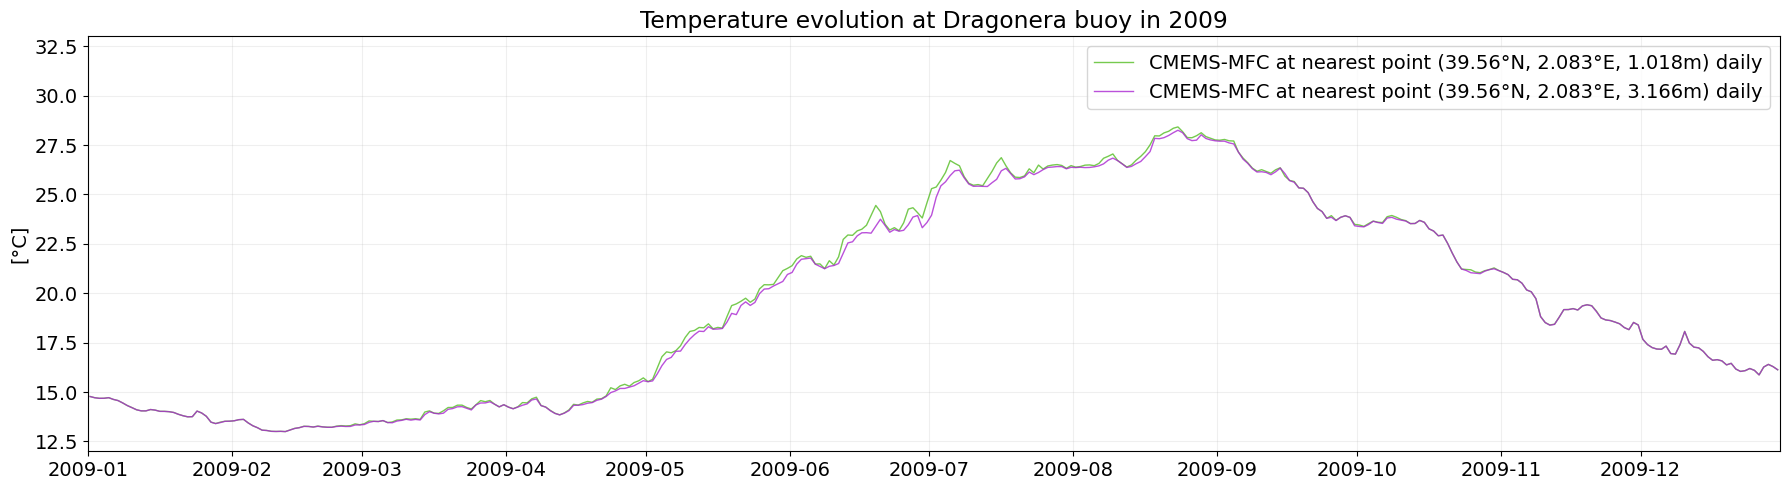

In [17]:
from data_plotters.timeseries_TEMP import plot_timeserie
from datetime import datetime
import matplotlib.pyplot as plt

for year in range(2009,2010):
    plot_timeserie(
        vars = {
            # "Dragonera insitu": ds_dragonera_insitu.T.sel(time=slice(datetime(year, 1, 1), datetime(year, 12, 31))),
            # "CMEMS-SST": ds_cmems_sst.analysed_sst.sel(time=slice(datetime(year, 1, 1), datetime(year, 12, 31))),
            "CMEMS-MFC": ds_cmems_mfc.thetao.sel(depth=0, method="nearest").sel(time=slice(datetime(year, 1, 1), datetime(year, 12, 31))),
            "CMEMS-MFCd": ds_cmems_mfc.thetao.sel(depth=3, method="nearest").sel(time=slice(datetime(year, 1, 1), datetime(year, 12, 31))),
        },
        times = {
            "Dragonera insitu": ds_dragonera_insitu.time.sel(time=slice(datetime(year, 1, 1), datetime(year, 12, 31))),
            "CMEMS-SST": ds_cmems_sst.time.sel(time=slice(datetime(year, 1, 1), datetime(year, 12, 31))),
            "CMEMS-MFC": ds_cmems_mfc.time.sel(time=slice(datetime(year, 1, 1), datetime(year, 12, 31))),
            "CMEMS-MFCd": ds_cmems_mfc.time.sel(time=slice(datetime(year, 1, 1), datetime(year, 12, 31))),
        },
        labels = {
            "Dragonera insitu": "Dragonera buoy insitu hourly",
            "CMEMS-SST": "CMEMS-SST at nearest point (39.55°N, 2.094°E) daily",
            "CMEMS-MFC": "CMEMS-MFC at nearest point (39.56°N, 2.083°E, 1.018m) daily",
            "CMEMS-MFCd": "CMEMS-MFC at nearest point (39.56°N, 2.083°E, 3.166m) daily",
        },
        colors = {
            "Dragonera insitu": "#DA3226CC",
            "CMEMS-SST": "#2665DACC",
            "CMEMS-MFC": "#54BD23CC",
            "CMEMS-MFCd": "#A926D1CC",
        },
        title = f"Temperature evolution at Dragonera buoy in {year}",
        fontsize = 14,
        ylim=(12, 33),
        xlim=(datetime(year, 1, 1), datetime(year, 12, 31)),
    )

    plt.show()
    plt.clf()
    plt.close('all')

In [ ]:
from data_plotters.timeseries_TEMP import plot_timeserie
from datetime import datetime
import matplotlib.pyplot as plt

plot_timeserie(
    vars = {
        "Dragonera insitu": ds_dragonera_insitu.T,
        "CMEMS-SST": ds_cmems_sst.analysed_sst,
        "CMEMS-MFC": ds_cmems_mfc.thetao,
    },
    times = {
        "Dragonera insitu": ds_dragonera_insitu.time,
        "CMEMS-SST": ds_cmems_sst.time,
        "CMEMS-MFC": ds_cmems_mfc.time,
    },
    labels = {
        "Dragonera insitu": "Dragonera buoy insitu hourly",
        "CMEMS-SST": "CMEMS-SST at nearest point (39.55°N, 2.094°E) daily",
        "CMEMS-MFC": "CMEMS-MFC at nearest point (39.56°N, 2.083°E, 3.166m) daily",
    },
    colors = {
        "Dragonera insitu": "#DA3226CC",
        "CMEMS-SST": "#2665DACC",
        "CMEMS-MFC": "#A926D1CC",
    },
    title = f"Multiplatform temperature evolution at Dragonera buoy",
    fontsize = 14,
    ylim=(12, 36),
    figsize=(18,5.5)
    # xlim=(datetime(year, 1, 1), datetime(year, 12, 31)),
)

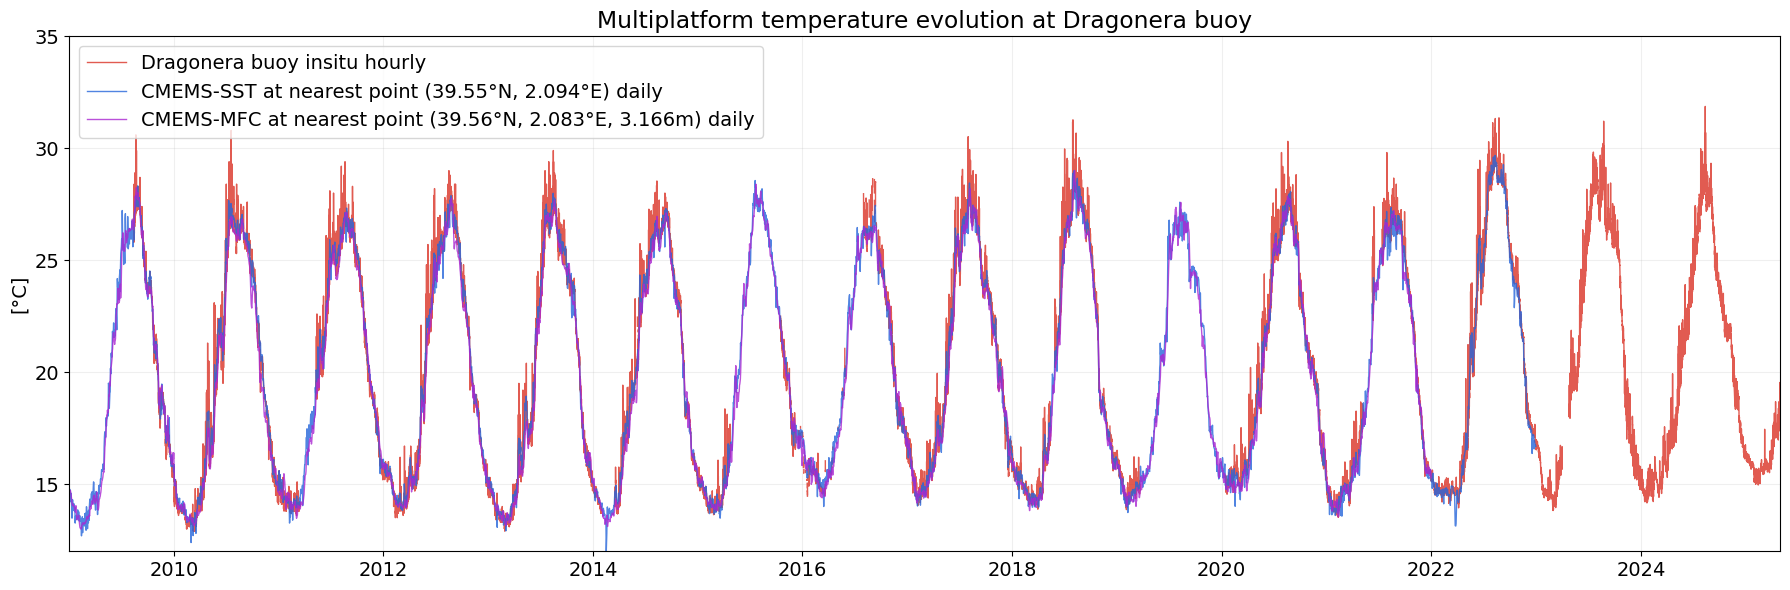

In [22]:
plt.show()

## Daily averaged plot

In [ ]:
ds_dragonera_insitu_daily

<xarray.Dataset> Size: 138kB
Dimensions:                          (time: 5739)
Coordinates:
  * time                             (time) datetime64[ns] 46kB 2009-08-14 .....
Data variables:
    T                                (time) float64 46kB 26.1 26.71 ... 18.34
    Canal de obtencion de los datos  (time) float64 46kB 2.0 2.0 2.0 ... 3.0 3.0

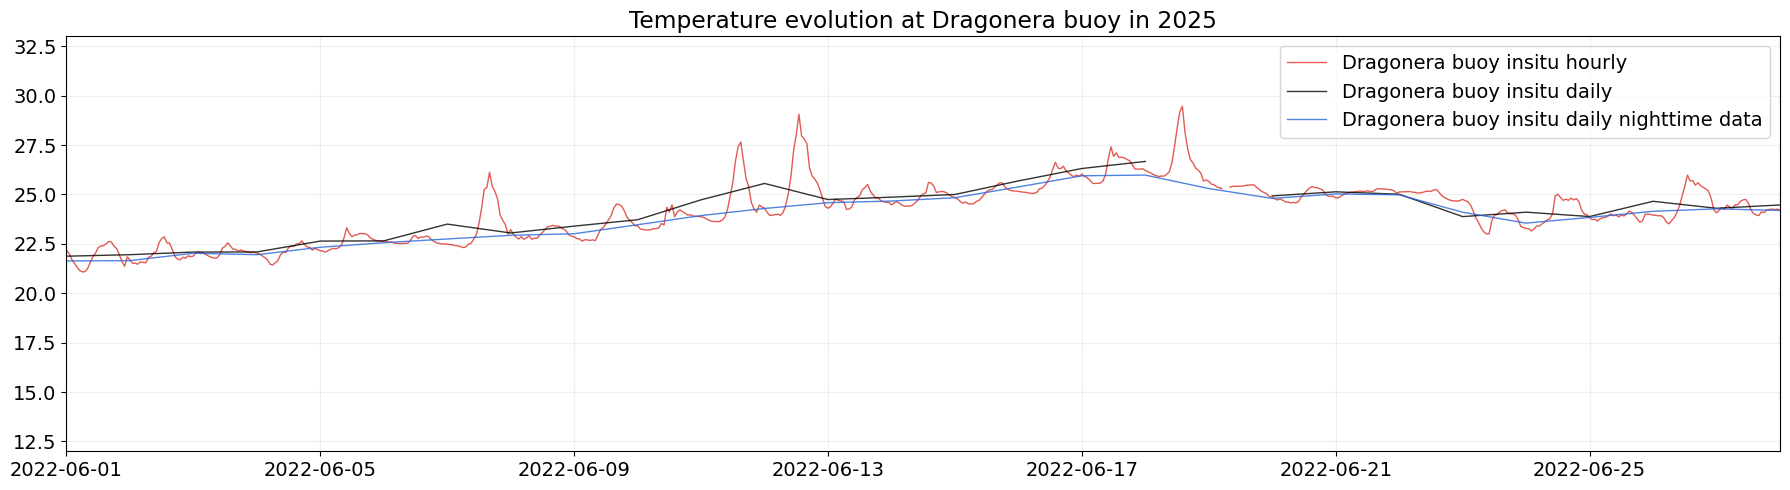

In [104]:
from data_plotters.timeseries_TEMP import plot_timeserie
from datetime import datetime
import matplotlib.pyplot as plt

for year in range(2025,2026):
    date_start = datetime(2022, 6, 1)
    date_end = datetime(2022, 6, 28)
    # date_start = datetime(year, 1, 1)
    # date_end = datetime(year, 12, 31)

    plot_timeserie(
        vars = {
            "Dragonera insitu": ds_dragonera_insitu.T.sel(time=slice(date_start, date_end)),
            "Dragonera insitu daily": ds_dragonera_insitu_daily.T.sel(time=slice(date_start, date_end)),
            "Dragonera insitu daily night": ds_dragonera_insitu_daily_night.T.sel(time=slice(date_start, date_end)),
        },
        times = {
            "Dragonera insitu": ds_dragonera_insitu.time.sel(time=slice(date_start, date_end)),
            "Dragonera insitu daily": ds_dragonera_insitu_daily.time.sel(time=slice(date_start, date_end)),
            "Dragonera insitu daily night": ds_dragonera_insitu_daily_night.time.sel(time=slice(date_start, date_end)),
        },
        labels = {
            "Dragonera insitu": "Dragonera buoy insitu hourly",
            "Dragonera insitu daily": "Dragonera buoy insitu daily",
            "Dragonera insitu daily night": "Dragonera buoy insitu daily nighttime data",
        },
        colors = {
            "Dragonera insitu": "#DA3226CC",
            "Dragonera insitu daily": "#000000CC",
            "Dragonera insitu daily night": "#2665DACC",
        },
        title = f"Temperature evolution at Dragonera buoy in {year}",
        fontsize = 14,
        ylim=(12, 33),
        # ylim=(None, 28),
        xlim=(date_start, date_end),
        show_plot=False
    )

    # for day in range(3,4):
    #     plt.fill_between([datetime(2014, 6, day, 0), datetime(2014, 6, day+1, 0)], 50, color="#2965AA86", label="Average window" if day==3 else None)
    #     plt.legend(fontsize=14)

    plt.show()
    plt.clf()
    plt.close("all")

In [39]:

print(f"All day STD: {ds_dragonera_insitu.T.std().values:.2f} °C")
print(f"Nighttime STD: {load_dragonera_insitu(nightime_data=True).T.std().values:.2f} °C")

All day STD: 4.81 °C
Nighttime STD: 4.76 °C
